# Data Visualization

### In this file, we will approach a better visualization of our "dataframe" by showing techniques learned in class and extracting valuable information for analysis.


### Importing the main libraries


In [36]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/first-steps/matches_info_df.csv", index_col=0)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,235,145,Andre Marriner,2,0,1,0,11,8,0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,213,98,Martin Atkinson,2,0,2,0,11,12,0
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,191,100,Kevin Friend,1,0,1,0,11,9,0
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,223,101,Mike Dean,1,0,2,0,9,11,1
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,169,77,Chris Kavanagh,2,0,1,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,267,145,Martin Atkinson,0,0,2,0,3,11,0
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,235,145,Jonathan Moss,3,0,3,0,9,6,0
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,207,108,Lee Probert,0,0,1,0,8,6,0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,236,124,Andre Marriner,0,0,2,0,10,13,0


### The main information of the matches

In [37]:
matches_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 379
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   result                                380 non-null    int64  
 1   performance_rank_home                 380 non-null    int64  
 2   home_team_name                        380 non-null    object 
 3   B365H                                 380 non-null    float64
 4   B365D                                 380 non-null    float64
 5   B365A                                 380 non-null    float64
 6   away_team_name                        380 non-null    object 
 7   away_performance_rank                 380 non-null    int64  
 8   Pre-Match PPG (Home)                  380 non-null    float64
 9   Pre-Match PPG (Away)                  380 non-null    float64
 10  home_team_goal_count                  380 non-null    int64  
 11  away_team_goal_count    

In [38]:
matches_info_df.describe()

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,away_team_corner_count,home_season_shots,home_season_shots_on_target,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.315789,10.500000,3.289184,4.583447,5.633763,10.500000,1.480895,1.167632,1.568421,1.252632,...,4.557895,215.300000,109.450000,1.544737,0.047368,1.715789,0.076316,10.160526,10.281579,0.300000
std,1.915156,5.773884,3.264296,1.944515,5.920971,5.773884,0.831446,0.761209,1.312836,1.180031,...,2.731487,33.315625,23.797854,1.228766,0.212706,1.208267,0.275599,3.287944,3.490232,0.458862
min,-5.000000,1.000000,1.060000,3.000000,1.120000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,169.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,-1.000000,5.750000,1.570000,3.500000,2.300000,5.750000,1.000000,0.630000,1.000000,0.000000,...,2.750000,190.500000,97.000000,1.000000,0.000000,1.000000,0.000000,8.000000,8.000000,0.000000
50%,0.000000,10.500000,2.300000,3.800000,3.400000,10.500000,1.470000,1.075000,1.000000,1.000000,...,4.000000,213.000000,104.500000,1.000000,0.000000,2.000000,0.000000,10.000000,10.000000,0.000000
75%,2.000000,15.250000,3.250000,5.000000,6.500000,15.250000,2.062500,1.610000,2.000000,2.000000,...,6.000000,235.250000,119.500000,2.000000,0.000000,2.000000,0.000000,12.000000,12.250000,1.000000
max,6.000000,20.000000,23.000000,17.000000,41.000000,20.000000,3.000000,3.000000,6.000000,6.000000,...,14.000000,307.000000,167.000000,6.000000,1.000000,5.000000,2.000000,23.000000,21.000000,1.000000


Verifying if there are some duplicates

In [39]:
matches_info_df[matches_info_df.duplicated()].head()
# we dont have any dup

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty


### identifying the columns that have a NAN

In [40]:
# Identificação das colunas com valores nulos e contagem dos valores nulos
null_counts = matches_info_df.isnull().sum()

# Filtragem das colunas que possuem valores nulos
null_counts = null_counts[null_counts > 0]

# Print das colunas com valores nulos e suas respectivas contagens
print(null_counts)

home_team_goal_timings              88
away_team_goal_timings             119
home_team_shots_on_target_dirty    114
dtype: int64


### verifying if there is some real NANs home_team_timings or those games just doesnt had a goal

In [41]:
def verifying_nans(column_to_verify, auxiliar_column):
    # Identify rows where the specified column is null
    null_values = matches_info_df[column_to_verify].isnull()

    # Save the indices of the rows where the specified column is null
    null_rows = matches_info_df[null_values].index

    # Check if the auxiliary column is non-zero in the rows with null indices
    any_incorrect = (matches_info_df.loc[null_rows, auxiliar_column] != 0).any()

    # Print the result
    print(f"Are there any missing values in '{column_to_verify}' with non-zero '{auxiliar_column}'? {any_incorrect}")

# Check for missing values in 'home_team_goal_timings' with non-zero 'home_team_goal_count'
verifying_nans('home_team_goal_timings', 'home_team_goal_count')

# Check for missing values in 'away_team_goal_timings' with non-zero 'away_team_goal_count'
verifying_nans('away_team_goal_timings', 'away_team_goal_count')


Are there any missing values in 'home_team_goal_timings' with non-zero 'home_team_goal_count'? False
Are there any missing values in 'away_team_goal_timings' with non-zero 'away_team_goal_count'? False


### It seems those NaN values in the columns represent cases where the team didn't score any goals in the respective matches.

### Lets check the column home_team_shots_on_target_dirty

In [42]:
def verifying_target_shots_nans(column_to_verify, auxiliary_column):
    # Calculate the sum of the 'column_to_verify'
    target_shots_count = matches_info_df[column_to_verify].sum()

    # Calculate the total count expected for the 'auxiliary_column'
    # Assuming a team plays 19 times at home and there are 20 teams 
    # (19x20= 380 the size of data frame), the total count is divided by 19
    # so we divided by 19 cause we want the total shots on target of each team
    target_shots_total_count = matches_info_df[auxiliary_column].sum() / 19

    # Print the result
    if target_shots_count == target_shots_total_count:
        print(f'The column {column_to_verify} has data missing? False')
    else:
        print(f'The column {column_to_verify} has data missing? True')

# Verify missing data for 'home_team_shots_on_target_dirty' column using 'home_season_shots_on_target' as the auxiliary column
verifying_target_shots_nans('home_team_shots_on_target_dirty', 'home_season_shots_on_target')

# Verify missing data for 'home_team_shots_on_target_original' column using 'home_season_shots_on_target' as the auxiliary column
verifying_target_shots_nans('home_team_shots_on_target_original', 'home_season_shots_on_target')

The column home_team_shots_on_target_dirty has data missing? True
The column home_team_shots_on_target_original has data missing? False


### The presence of NaN values in those columns signifies missing data, particularly when the corresponding teams didn't score any goals during those matches. This observation confirms the existence of missing values in the dataset.

lets see the statistics about the home team shots and home team shots on target

In [43]:
print(matches_info_df.home_team_shots.describe())
matches_info_df.home_team_shots_on_target_dirty.describe()

count    380.000000
mean      11.331579
std        4.278011
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       26.000000
Name: home_team_shots, dtype: float64


count    266.000000
mean       5.748120
std        2.681962
min        0.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       15.000000
Name: home_team_shots_on_target_dirty, dtype: float64


### It seems they have a correlation where half of the shots taken hit the crossbar; we'll verify this further in the code later on.

### Plot the Distribution of Match Results

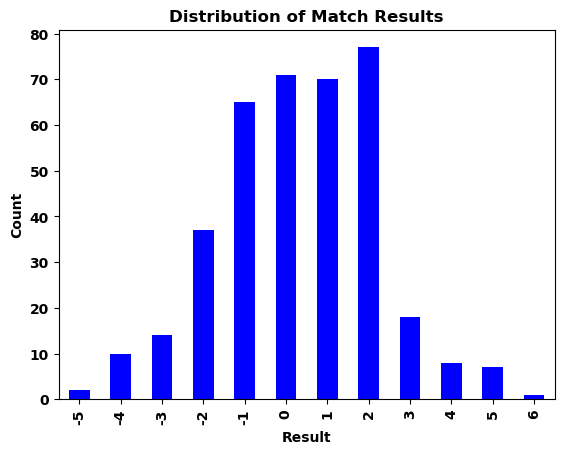

In [44]:
# Count the Results
result_counts = matches_info_df['result'].value_counts()

# Order the Results
result_counts_sorted = result_counts.sort_index()

# Plot the distribution of ordered results
result_counts_sorted.plot(kind='bar', color='blue')
plt.title('Distribution of Match Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

We can observe that the majority of matches end with a positive goal difference of 2, indicating that the home team indeed holds favoritism. Additionally, it's worth noting that the highest goal difference is 6, while the lowest is -5, suggesting that there aren't significant disparities between teams, unlike in the Brazilian Serie D, where goal differences can reach 13, for example.

## Analysis of Betting Data




#### Here we plotted 3 different graphs related to the "bets" addressing "home team winning, draw, and away team winning". From them, we can see that they follow a logarithmic function.

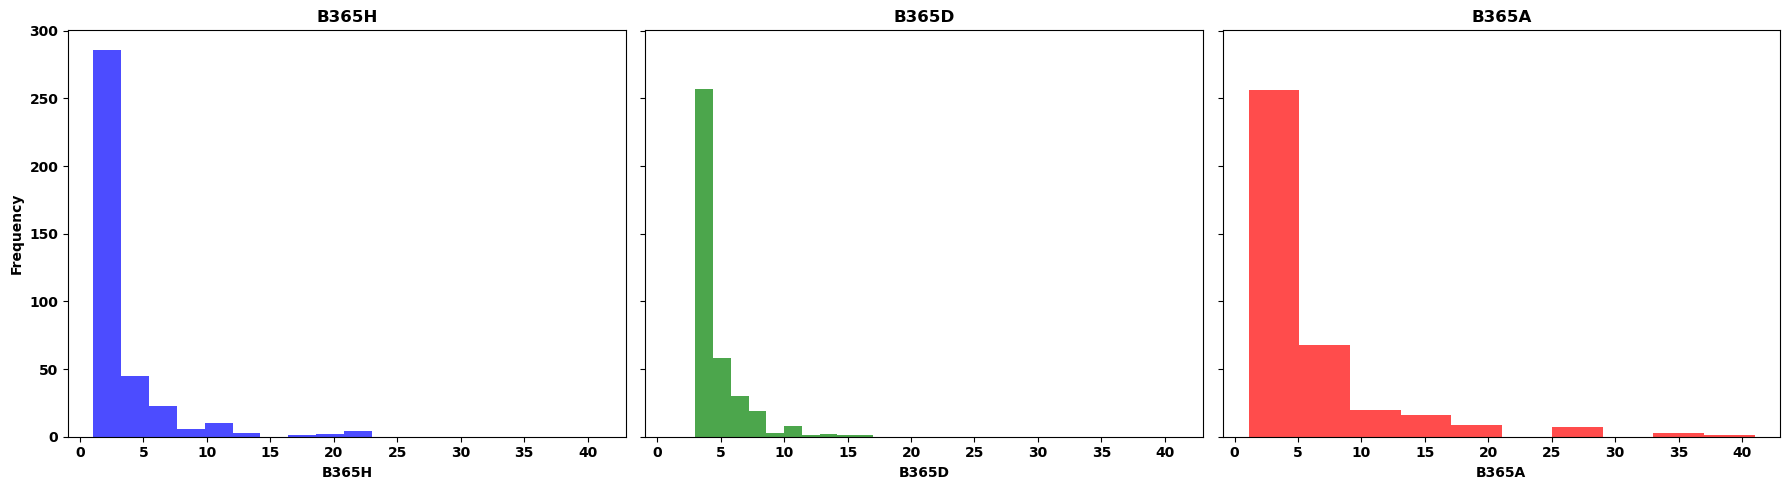

In [45]:
# Criar a figura e os eixos para os subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)

# Plotar o histograma de B365H
ax1.hist(matches_info_df['B365H'], bins=10, color='blue', alpha=0.7)
ax1.set_title('B365H')
ax1.set_xlabel('B365H')
ax1.set_ylabel('Frequency')

# Plotar o histograma de B365D
ax2.hist(matches_info_df['B365D'], bins=10, color='green', alpha=0.7)
ax2.set_title('B365D')
ax2.set_xlabel('B365D')

# Plotar o histograma de B365A
ax3.hist(matches_info_df['B365A'], bins=10, color='red', alpha=0.7)
ax3.set_title('B365A')
ax3.set_xlabel('B365A')

# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout()
plt.show()


### Como podemos ver segue uma funçao logaritma
#### Então para facilitar nossa vizualização vamos trabalhar com o log desses numeros

In [46]:
matches_info_df['B365H_log'] = np.log(matches_info_df['B365H'])
matches_info_df['B365D_log'] = np.log(matches_info_df['B365D'])
matches_info_df['B365A_log'] = np.log(matches_info_df['B365A'])
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty,B365H_log,B365D_log,B365A_log
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,2,0,1,0,11,8,0,0.451076,1.360977,2.014903
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,2,0,2,0,11,12,0,1.360977,1.252763,0.712950
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,1,0,1,0,11,9,0,0.641854,1.280934,1.504077
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,1,0,2,0,9,11,1,0.916291,1.223775,1.098612
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,2,0,1,0,9,8,0,1.871802,1.386294,0.476234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,0,0,2,0,3,11,0,0.262364,1.791759,2.397895
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,3,0,3,0,9,6,0,0.246860,1.871802,2.397895
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,0,0,1,0,8,6,0,0.364643,1.558145,2.140066
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,0,0,2,0,10,13,0,0.788457,1.252763,1.252763


#### Now, we will apply the same method, but this time we will use the logarithm of the bet values. 

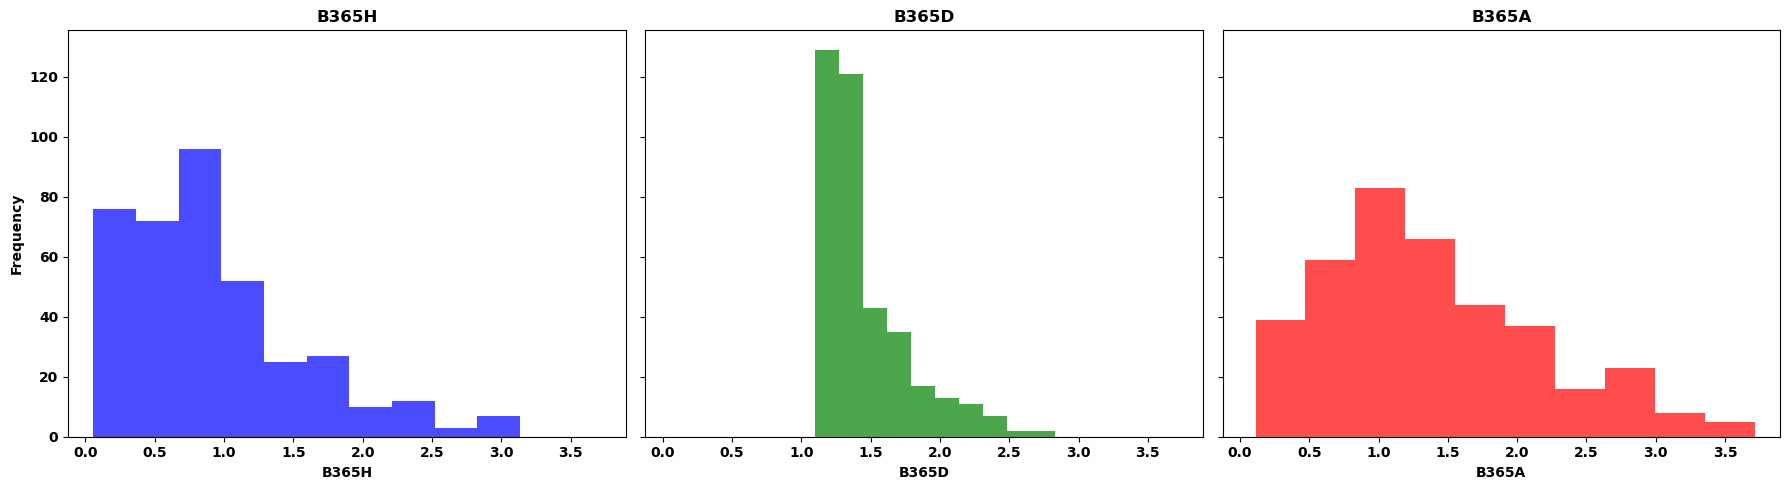

In [47]:
# Criar a figura e os eixos para os subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)

# Plotar o histograma de B365H
ax1.hist(matches_info_df['B365H_log'], bins=10, color='blue', alpha=0.7)
ax1.set_title('B365H')
ax1.set_xlabel('B365H')
ax1.set_ylabel('Frequency')

# Plotar o histograma de B365D
ax2.hist(matches_info_df['B365D_log'], bins=10, color='green', alpha=0.7)
ax2.set_title('B365D')
ax2.set_xlabel('B365D')

# Plotar o histograma de B365A
ax3.hist(matches_info_df['B365A_log'], bins=10, color='red', alpha=0.7)
ax3.set_title('B365A')
ax3.set_xlabel('B365A')

# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout()
plt.show()


As we can see, the odds for a draw exhibit a noticeable logarithmic pattern with little variation, suggesting that draw odds typically don't fluctuate significantly. Additionally, we observe that they range between 1 and 3, indicating that a draw is seldom the most probable or improbable outcome. This makes sense if we consider that in evenly matched games, the draw odds will be relatively low but evenly distributed between the teams. Conversely, in lopsided matches, the draw odds will always be lower than those of the underdog.

The odds for the home team tend to concentrate towards the beginning of the distribution, confirming that the home team is favored. Conversely, the odds for the away team exhibit a more spread-out distribution, indicating that they don't enjoy as much favoritism. This suggests that playing away from home can directly impact a team's performance.

In [48]:
# descretizando
# Interpretação: Discretizar antes de normalizar mantém os valores 
# originais dentro de cada bin, o que pode ser mais fácil de interpretar e explicar.
# Simplificação: Discretizar antes pode reduzir a variabilidade e 
# simplificar a estrutura dos dados antes de aplicar a normalização.
# Usando 5 bins super fav, fav, pau a pau, azarao, super azarão
matches_info_df['B365H_classification'] = pd.cut(matches_info_df['B365H_log'], bins=5, labels=False)
matches_info_df['B365D_classification'] = pd.cut(matches_info_df['B365D_log'], bins=5, labels=False)
matches_info_df['B365A_classification'] = pd.cut(matches_info_df['B365A_log'], bins=5, labels=False)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,away_team_red_cards,home_team_fouls,away_team_fouls,dirty,B365H_log,B365D_log,B365A_log,B365H_classification,B365D_classification,B365A_classification
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,0,11,8,0,0.451076,1.360977,2.014903,0,0,2
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,0,11,12,0,1.360977,1.252763,0.712950,2,0,0
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,0,11,9,0,0.641854,1.280934,1.504077,0,0,1
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,0,9,11,1,0.916291,1.223775,1.098612,1,0,1
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,0,9,8,0,1.871802,1.386294,0.476234,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,0,3,11,0,0.262364,1.791759,2.397895,0,1,3
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,0,9,6,0,0.246860,1.871802,2.397895,0,2,3
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,0,8,6,0,0.364643,1.558145,2.140066,0,1,2
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,0,10,13,0,0.788457,1.252763,1.252763,1,0,1


## Analysis of Dirty Data

Here we decided to plot two graphs that show the difference between the original shots data and the shots data that were manipulated.

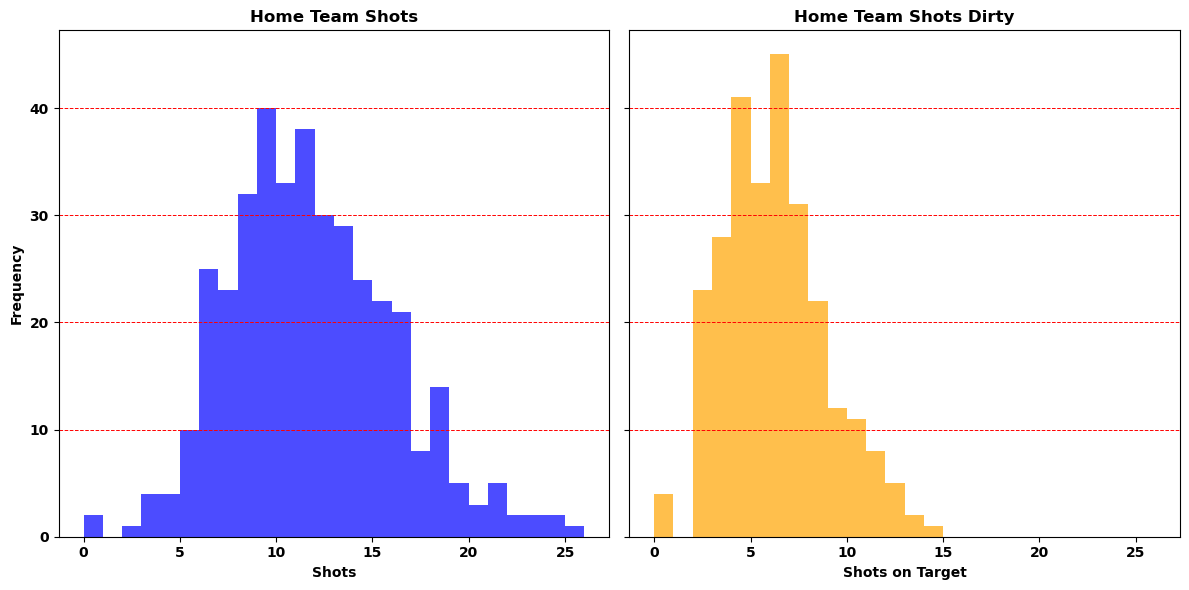

In [49]:
# Extraction of relevant data
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_dirty']

# Creation of plots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6), sharex=True)

# Plot of the histogram for general_shots
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Adding the dashed green lines
for y in [40, 30, 20, 10]:
    ax1.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax2.axhline(y=y, color='red', linestyle='--', linewidth=0.7)

# Plot of the histogram for shots_on_target
ax2.hist(shots_on_target, bins=int(shots_on_target.max()), color='orange', alpha=0.7)
ax2.set_title('Home Team Shots Dirty')
ax2.set_xlabel('Shots on Target')

# Layout adjustment
plt.tight_layout()
plt.show()

Indeed, the data appears to follow a normal distribution.

In this box plot graph, we can identify in the manipulated data a greater proximity of the quartiles to zero compared to the original data.

<Axes: >

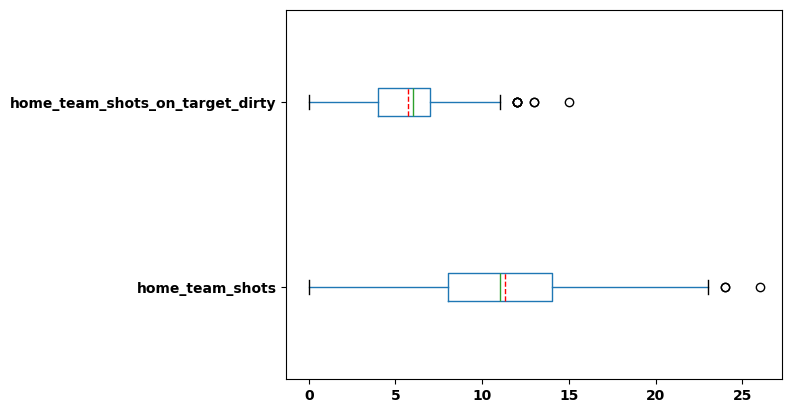

In [50]:
# Boxplot of Home Team Shots and Shots on Target
matches_info_df.boxplot(
    column=['home_team_shots', 'home_team_shots_on_target_dirty'],
    grid=False,
    vert=False,
    showmeans=True,
    meanline=True,
    meanprops=dict(color='red', linestyle='--')
)

## Analysis of teams in the final part of the season

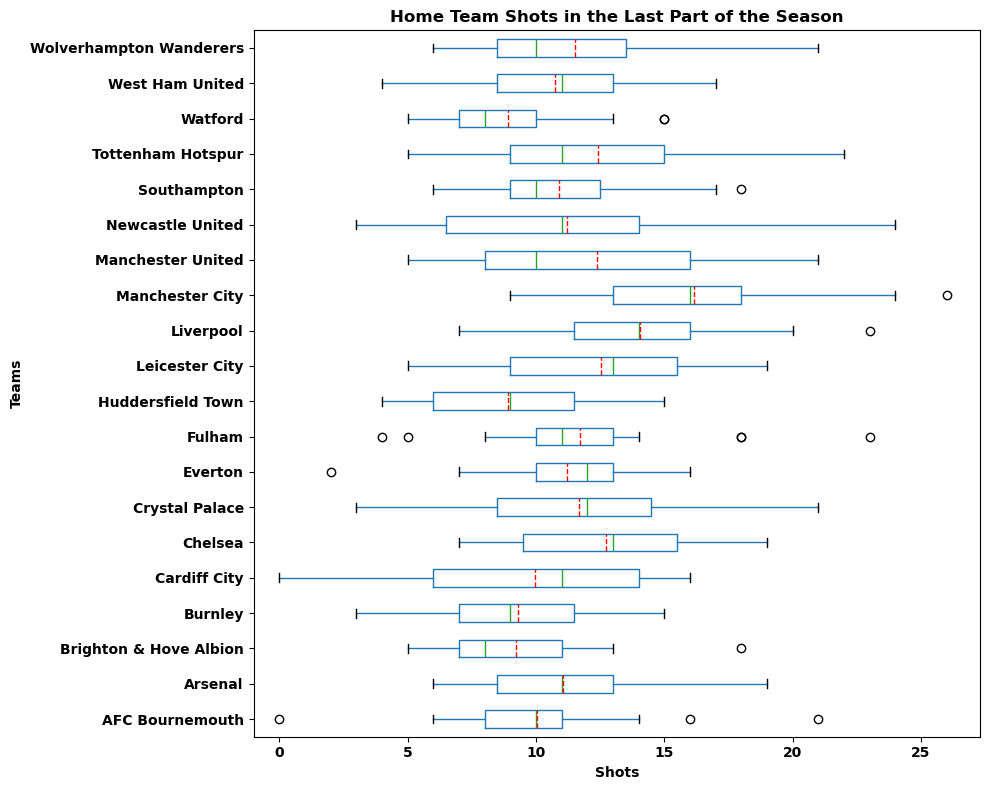

In [51]:
# Creating a pivoted DataFrame to use in the boxplot creation for the last part of the season
team_shots_df = matches_info_df.pivot(columns='home_team_name', values='home_team_shots')

# Creating the boxplots with shared x-axis
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))


# Criando o gráfico de caixa com média
team_shots_df.boxplot(vert=False, showmeans=True, meanline=True, meanprops=dict(color='red', linestyle='--'), figsize=(10, 8), grid=False)
plt.xlabel('Shots')
plt.ylabel('Teams')
plt.title('Home Team Shots in the Last Part of the Season')
plt.xlim(left=-1)

# Adjusting the layout
plt.tight_layout()
plt.show()

Ao plotar o boxplot dos "Chutes do time da casa" de todas as equipes no final da temporada, é possível identificar alguns padrões interessantes:

Há equipes que apresentam um número significativamente maior de chutes a gol em comparação com outras, sugerindo sua determinação e esforço em vencer.

Além disso, através desses dados, é possível vislumbrar as características de algumas equipes ao longo do campeonato e formar algumas previsões sobre as melhores equipes. No entanto, antes de tirar conclusões precipitadas, é importante aprofundar a análise, considerando não apenas o final da temporada, mas o desempenho ao longo de toda a temporada.

### Lets see the statistics about one specific team

In [52]:
# Function to extract statistics of a specific team
def describing_team(column_to_verify, column_to_reference, team):
    return matches_info_df[matches_info_df[column_to_reference] == team][column_to_verify]

# Extracting data for Tottenham Hotspur
tottenham_shots = describing_team('home_team_shots', 'home_team_name', 'Tottenham Hotspur')
tottenham_shots_on_target = describing_team('home_team_shots_on_target_dirty', 'home_team_name', 'Tottenham Hotspur')

print(tottenham_shots.describe())
print(tottenham_shots_on_target.describe())

count    19.000000
mean     12.421053
std       4.586402
min       5.000000
25%       9.000000
50%      11.000000
75%      15.000000
max      22.000000
Name: home_team_shots, dtype: float64
count    15.000000
mean      6.466667
std       3.292126
min       2.000000
25%       4.000000
50%       5.000000
75%       9.000000
max      12.000000
Name: home_team_shots_on_target_dirty, dtype: float64


### Here we have the frequency with which Tottenham took shots and shots on target in the season.

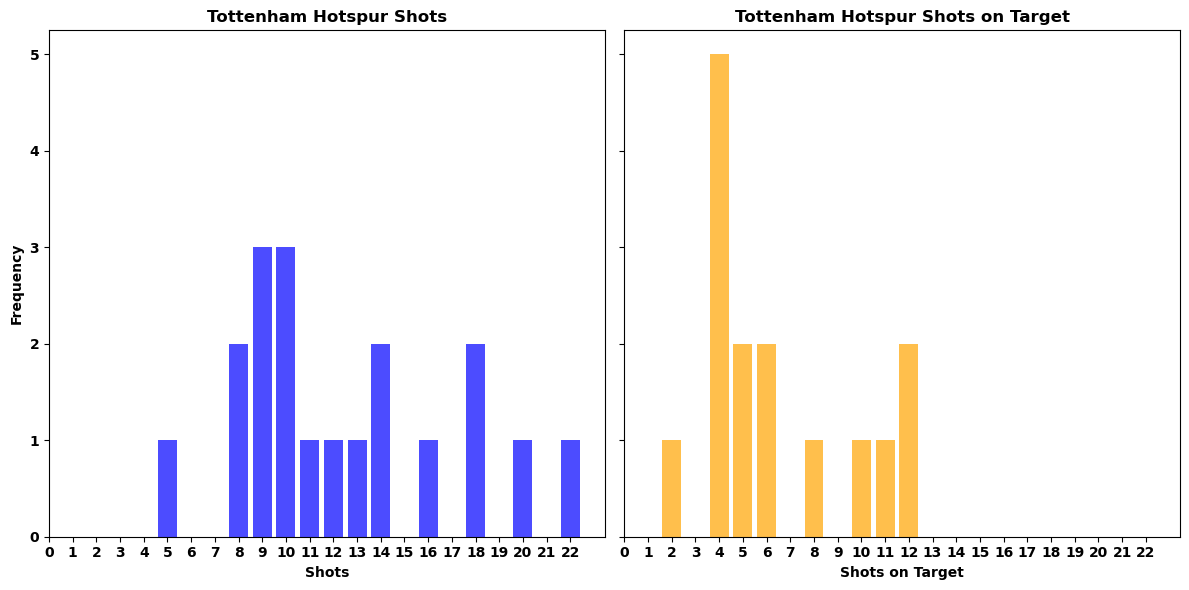

In [53]:
# Counting the Frequency of Unique Values
tottenham_shots_counts = tottenham_shots.value_counts().sort_index()
tottenham_shots_on_target_counts = tottenham_shots_on_target.value_counts().sort_index()

# Creating the bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6), sharex=True)

# Bar chart for total shots
ax1.bar(tottenham_shots_counts.index, tottenham_shots_counts.values, color='blue', alpha=0.7)
ax1.set_title('Tottenham Hotspur Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Bar chart for shots on target
ax2.bar(tottenham_shots_on_target_counts.index, tottenham_shots_on_target_counts.values, color='orange', alpha=0.7)
ax2.set_title('Tottenham Hotspur Shots on Target')
ax2.set_xlabel('Shots on Target')

# Adjusting the x-axis ticks to display only integer numbers
max_shots = max(tottenham_shots_counts.index.max(), tottenham_shots_on_target_counts.index.max())
ax1.set_xticks(range(0, max_shots + 1))
ax2.set_xticks(range(0, max_shots + 1))

# Adjusting the layout
plt.tight_layout()

# Displaying the charts
plt.show()

##### Os dados de chutes na barra podem estar estanhos por conta dos dados faltantes, podemos observar tambem que o tottenham é um time foi um time bem inconstante o que pode sugerir que houve algum problema
#### após algumas investigações descobrimos que o tottenham estava passando por uma mudança de tecnico, o que pode explicar essa inconstancia nas partidas


### Here we have the data in a boxplot for Tottenham's shots and shots on target.

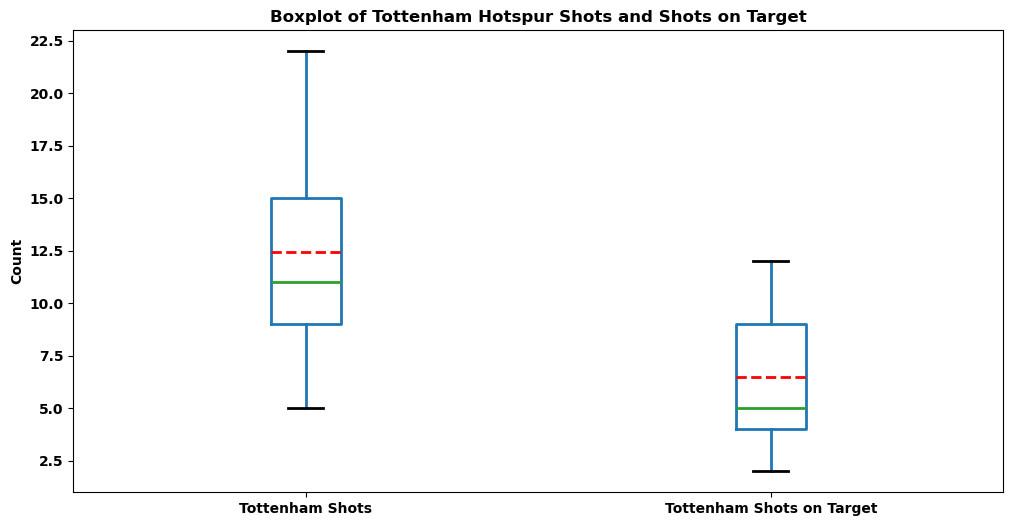

In [54]:

# Creating a DataFrame with the relevant columns for boxplot
tottenham_data = pd.DataFrame({
    'Tottenham Shots': tottenham_shots,
    'Tottenham Shots on Target': tottenham_shots_on_target
})

# Creating the boxplot
fig, ax = plt.subplots(figsize=(12, 6))
boxplot = tottenham_data.boxplot(column=['Tottenham Shots', 'Tottenham Shots on Target'], grid=False,  showmeans=True, meanline=True, meanprops=dict(color='red', linestyle='--'),)

for line in ax.lines:
    line.set_linewidth(2)

# Display the boxplot
plt.title('Boxplot of Tottenham Hotspur Shots and Shots on Target')
plt.ylabel('Count')
plt.show()

Com isso é possível observar que o Tottenham por exemplo possui muito mais tentaivas de chutes do que os chutes realmente efetivos "chutes no gol"

Isso talve pode evidenciar um time não muito preciso e que precise treinar um pouco mais suas finalizações

## Create a new column, how many shots the home team take to score a gol in a match

In [55]:
# how many shots a team playing home has to make to has score a goal in a match?
# Criar a nova coluna home_shots_2_score com a condicional
# tem infinitos pq times podem chutar mas nao marcar gols
matches_info_df['home_shots_2_score'] = np.where(
    matches_info_df['home_team_shots'] == 0, 
    0.0, 
    matches_info_df['home_team_shots'] / matches_info_df['home_team_goal_count']
)

print(matches_info_df['home_shots_2_score'])

0       4.0
1      11.0
2       5.5
3       inf
4       inf
       ... 
375     5.5
376     inf
377     7.0
378     4.5
379    11.0
Name: home_shots_2_score, Length: 380, dtype: float64


#### verificando qual foi as statistics das finalizações do time de fora contra o tottenham quando jogaram na casa do tottenham, o tottenham era o favorito e o tottenham ganhou a partida

In [56]:
# comparing the stats of all teams stats and tottenham stats
print(matches_info_df.away_team_shots.describe())

matches_info_df[(matches_info_df.home_team_name == 'Tottenham Hotspur') & 
                (matches_info_df.B365H < matches_info_df.B365A) & 
                (matches_info_df.result > 0)].away_team_shots.describe()

count    380.000000
mean       9.197368
std        3.341668
min        2.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       19.000000
Name: away_team_shots, dtype: float64


count    11.000000
mean      8.909091
std       4.592484
min       3.000000
25%       6.000000
50%       7.000000
75%      10.000000
max      19.000000
Name: away_team_shots, dtype: float64

Nessa parte nós decidimos comparar em que momento do campeonato os times possuem um maior número de chutes e tentar identificar os possíveis fatores de mudança

In [57]:
# describing the statistics of shots of each team on the first part of the season
matches_info_df[matches_info_df['season_part']=='first'].groupby(['home_team_name'])['home_team_shots'].describe()

,count,mean,std,min,25%,50%,75%,max
home_team_name,,,,,,,,
AFC Bournemouth,6.0,10.666667,2.943920,8.0,8.50,10.5,11.00,16.0
Arsenal,7.0,10.285714,3.988077,7.0,7.50,9.0,11.50,18.0
Brighton & Hove Albion,6.0,9.333333,2.581989,7.0,7.25,8.5,11.25,13.0
Burnley,5.0,7.000000,2.121320,4.0,6.00,7.0,9.00,9.0
Cardiff City,7.0,11.857143,4.879500,3.0,9.50,14.0,15.50,16.0
Chelsea,7.0,13.714286,3.251373,9.0,12.00,13.0,15.50,19.0
Crystal Palace,6.0,11.500000,2.738613,8.0,9.50,11.5,13.50,15.0
Everton,6.0,12.000000,1.549193,10.0,11.00,12.0,13.00,14.0
Fulham,5.0,13.600000,5.366563,10.0,11.00,11.0,13.00,23.0


In [58]:
# describing the statistics of shots of each team on the last part of the season
matches_info_df[matches_info_df['season_part']=='last'].groupby(['home_team_name'])['home_team_shots'].describe()

,count,mean,std,min,25%,50%,75%,max
home_team_name,,,,,,,,
AFC Bournemouth,6.0,9.000000,4.898979,0.0,8.25,10.0,11.75,14.0
Arsenal,6.0,10.500000,2.738613,6.0,9.50,11.0,11.75,14.0
Brighton & Hove Albion,8.0,10.125000,4.015595,5.0,7.50,11.0,11.00,18.0
Burnley,8.0,9.625000,4.172615,3.0,7.25,10.0,12.50,15.0
Cardiff City,7.0,9.428571,4.157609,5.0,6.00,8.0,13.00,15.0
Chelsea,7.0,13.714286,3.302236,9.0,11.50,14.0,16.00,18.0
Crystal Palace,8.0,11.375000,4.033343,6.0,8.25,12.0,14.50,16.0
Everton,7.0,10.428571,5.255383,2.0,7.00,12.0,14.50,16.0
Fulham,7.0,8.857143,3.338092,4.0,6.50,10.0,11.00,13.0


Dessa forma é possível observar o seguinte: Existem alguns times como o Manchester United por exemplo que tiveram uma mudança significativa na sua performaçe no início de campeonato e no final

### The Boxplot of home team shots in the mid and the last part of the season

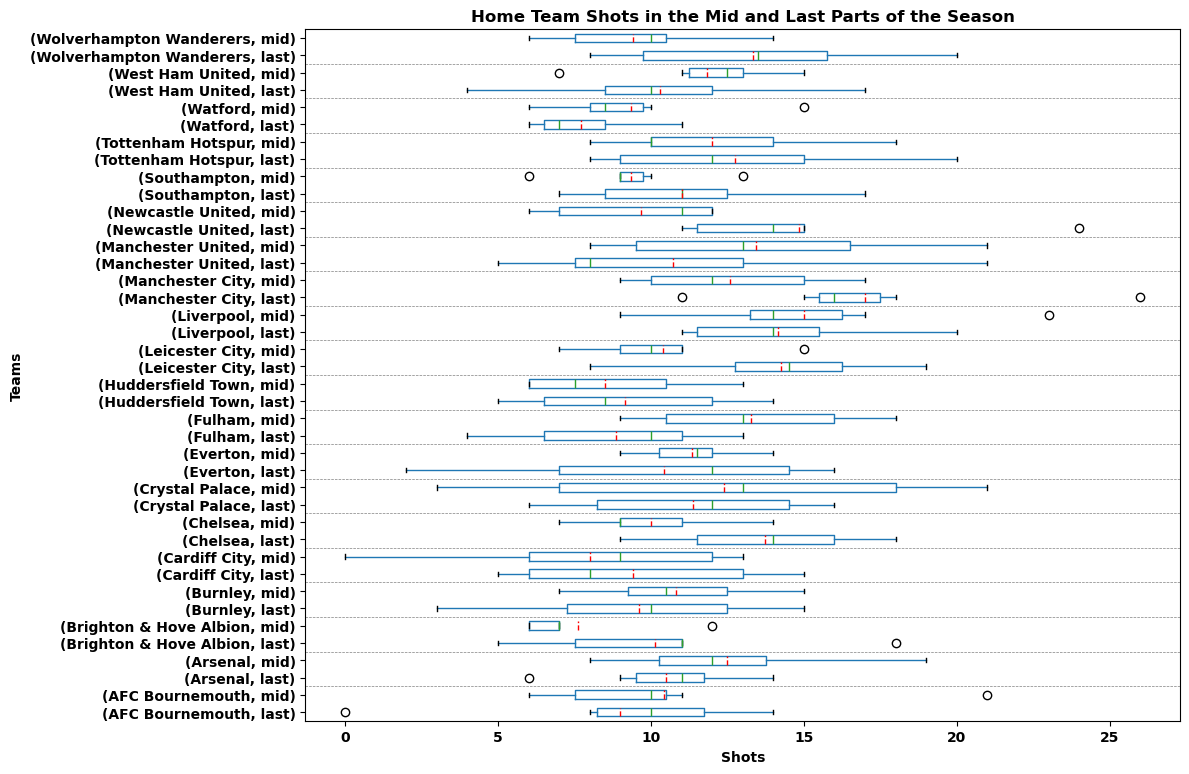

In [59]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Filtering the data to include only the mid-season part
mid_season_part = matches_info_df[matches_info_df['season_part'] == 'mid']

# Creating a pivoted DataFrame to use in the boxplot for the mid-season part
first_boxplot_data = mid_season_part.pivot(columns='home_team_name', values='home_team_shots')

# Filtering the data to include only the last part of the season
last_season_part = matches_info_df[matches_info_df['season_part'] == 'last']

# Creating a pivoted DataFrame to use in the boxplot for the last part of the season
last_boxplot_data = last_season_part.pivot(columns='home_team_name', values='home_team_shots')

# Combining the two DataFrames, adding an identifier for the season part
combined_data = pd.concat([first_boxplot_data.melt(var_name='team', value_name='shots').assign(season_part='mid'),
                           last_boxplot_data.melt(var_name='team', value_name='shots').assign(season_part='last')])

# Creating the box plot
fig, ax = plt.subplots(figsize=(12, 8))

# Drawing the box plots
combined_data.boxplot(column='shots', by=['team', 'season_part'], vert=False, ax=ax, grid=False, showmeans=True, meanline=True, meanprops=dict(color='red', linestyle='--'))

# Adding dividing lines between each pair of teams
teams = combined_data['team'].unique()
team_count = len(teams)

for i in range(1, team_count):
    plt.axhline(y=i * 2 + 0.5, color='gray', linestyle='--', linewidth=0.5)

# Adjusting the plot
ax.set_ylabel('Teams')
ax.set_xlabel('Shots')
ax.set_title('Home Team Shots in the Mid and Last Parts of the Season')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by' title
plt.tight_layout()
plt.show()

Este gráfico compara dois momentos da temporada: o meio e o final. A partir dele, podemos fazer uma análise comparativa dos ataques das equipes, identificando aquelas com ataques mais fortes em relação às demais. Também é possível inferir sobre a estratégia defensiva de cada time, e até mesmo entender o desempenho ao longo do campeonato, elucidando o motivo pelo qual o "Manchester City" teve uma classificação melhor do que o "Brighton & Hove Albion".

### Plotting the median of home team shots on a graph.

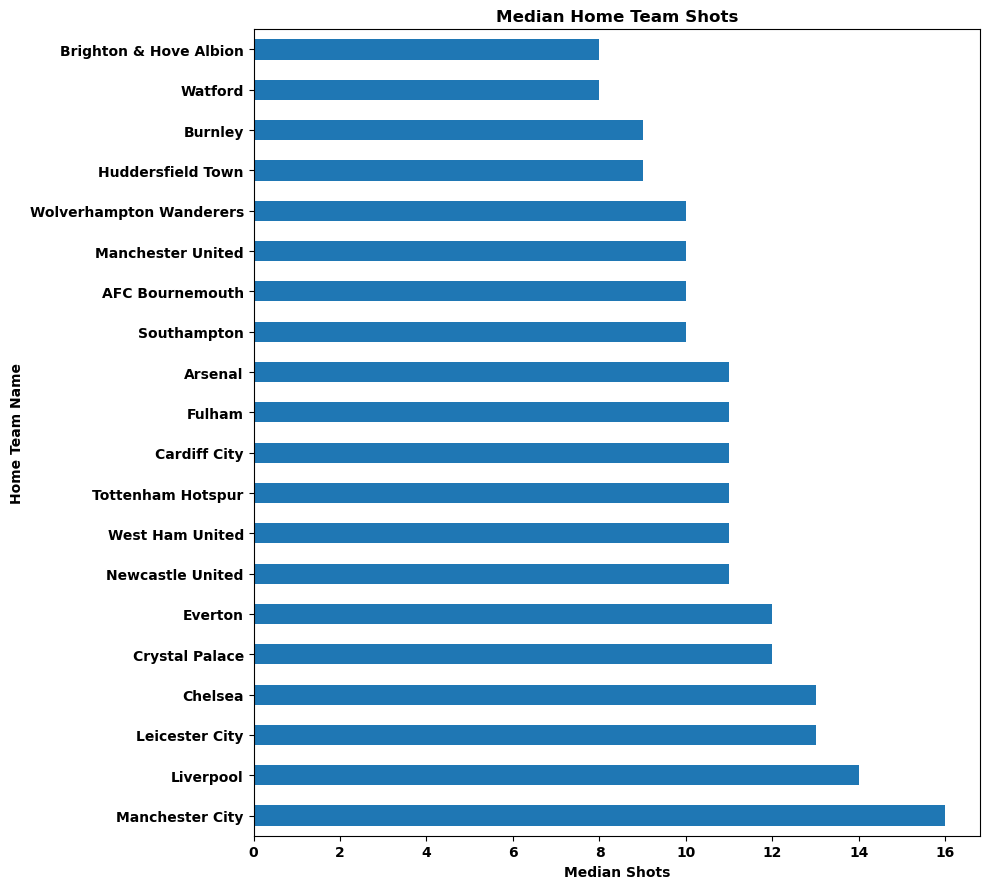

In [60]:
# Creating the figure and subplots
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 9))

# Plotting the first chart
matches_info_df.groupby(['home_team_name'])['home_team_shots'].median().sort_values(ascending=False).plot.barh(ax=ax1)
ax1.set_title('Median Home Team Shots')
ax1.set_xlabel('Median Shots')
ax1.set_ylabel('Home Team Name')

# Adjusting the layout
plt.tight_layout()

# Displaying the figure
plt.show()

podemos ver que realmente os dados seguem uma logica, e os times que terminaram nas partes mais altas da tabela sao tambem os que possuem uma maior mediana, como podemos verificar no dataframe impresso na parte da extração dos dados, os times que estavam no topo da tabela como Manchester City, Liverpool e Leichester City terminaram nos primeiros colocados, ja o Brigthon e o burnley teminaram na parte de baixo da tabela

### Filtering and Describing Data for Manchester City in the Last Part of the Season


In [61]:
desired_columns = ['home_team_name', 'away_team_name', 'season_part', 'result', 'home_team_shots', 'home_team_shots_on_target_dirty', 'away_team_shots', 'away_team_shots_on_target']
matches_info_df[(matches_info_df['season_part'] == 'last') & ((matches_info_df['home_team_name'] == 'Manchester City') | (matches_info_df['away_team_name'] == 'Manchester City'))][desired_columns].describe()

,result,home_team_shots,home_team_shots_on_target_dirty,away_team_shots,away_team_shots_on_target
count,14.000000,14.000000,10.000000,14.000000,14.000000
mean,0.142857,10.571429,5.900000,8.857143,5.285714
std,2.444999,7.582513,4.012481,5.141941,2.643674
min,-3.000000,0.000000,0.000000,2.000000,2.000000
25%,-2.000000,4.500000,2.500000,4.250000,3.000000
50%,0.000000,9.500000,5.500000,8.500000,5.000000
75%,1.750000,16.000000,9.500000,12.750000,7.750000
max,6.000000,26.000000,12.000000,18.000000,10.000000


### Filtering Manchester City's matches at home and away with their match statistics.

In [62]:
matches_info_df[(matches_info_df['season_part'] == 'last') & ((matches_info_df['home_team_name'] == 'Manchester City') | (matches_info_df['away_team_name'] == 'Manchester City'))][desired_columns]

,home_team_name,away_team_name,season_part,result,home_team_shots,home_team_shots_on_target_dirty,away_team_shots,away_team_shots_on_target
248,Manchester City,Arsenal,last,2,16,NaN,3,3
250,Everton,Manchester City,last,-2,2,2.0,9,5
259,Manchester City,Chelsea,last,6,15,10.0,8,5
278,Manchester City,West Ham United,last,1,18,8.0,3,2
280,AFC Bournemouth,Manchester City,last,-1,0,NaN,18,8
295,Manchester City,Watford,last,2,17,10.0,2,2
304,Fulham,Manchester City,last,-2,4,0.0,16,8
318,Manchester City,Cardiff City,last,2,26,12.0,4,2
332,Crystal Palace,Manchester City,last,-2,6,4.0,14,7
336,Manchester City,Tottenham Hotspur,last,1,11,5.0,8,5


podemos ver que realmente o time campeao foi avassalador no final da temporada, cedendo poucos chutes ao adversario e realizando muitos chutes

### Now we have created a subplot that shows the difference between the two datasets "dirty" and "corner count".

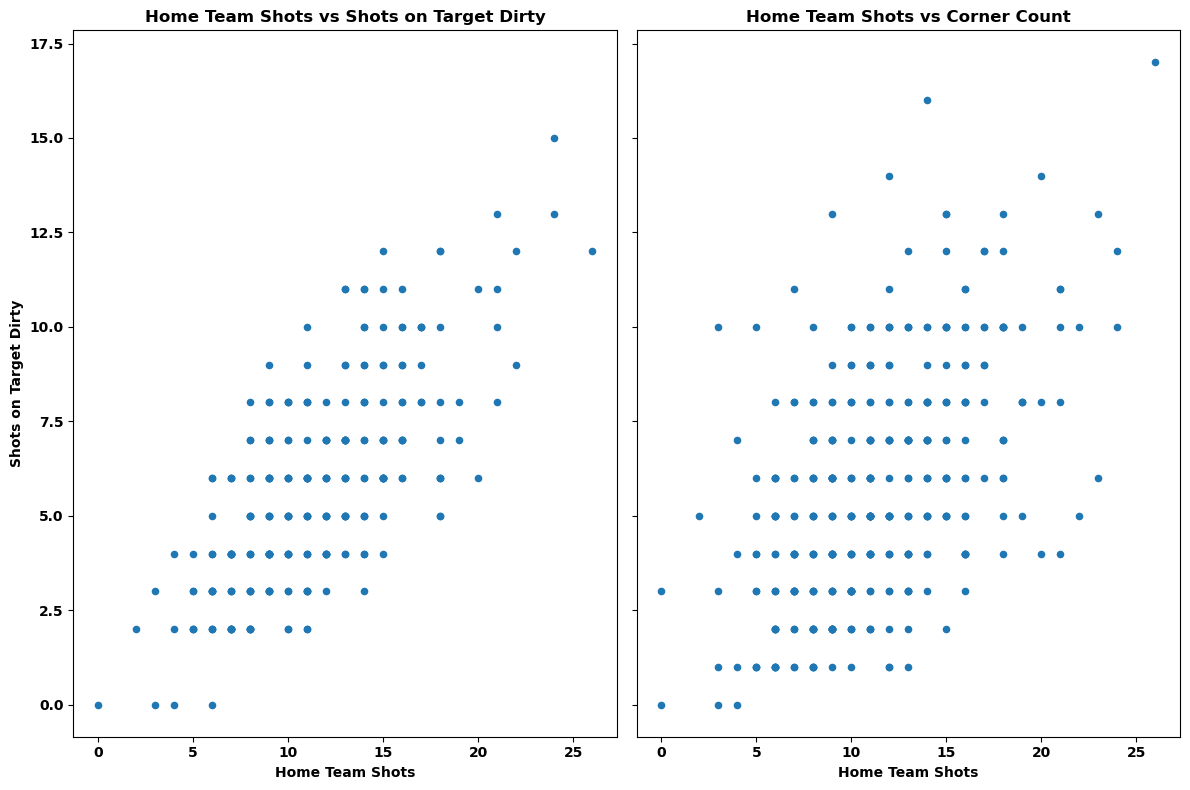

In [63]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

# Plot the first scatter plot
matches_info_df.plot.scatter(x='home_team_shots', y='home_team_shots_on_target_dirty', ax=ax1)
ax1.set_title('Home Team Shots vs Shots on Target Dirty')
ax1.set_xlabel('Home Team Shots')
ax1.set_ylabel('Shots on Target Dirty')

# Plot the second scatter plot
matches_info_df.plot.scatter(x='home_team_shots', y='home_team_corner_count', ax=ax2)
ax2.set_title('Home Team Shots vs Corner Count')
ax2.set_xlabel('Home Team Shots')

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()

As colunas de chutes e chutes ao gol no grafico parecem estar fortemente correlacionadas postivamente

As colunas de chutes e escanteios parecem tambem estarem correlacionadas positivamente, porem moderadamente

## Plots the correlation matrix as a heatmap using Seaborn library.


##### Selects only the numeric columns from the matches_info_df DataFrame. Then, it further filters these numeric columns to include specific columns of interest related to betting odds (B365H) and statistics of shots and shots on target for both home and away teams. After selecting these columns, it calculates the correlation matrix to analyze the relationships between these variables.

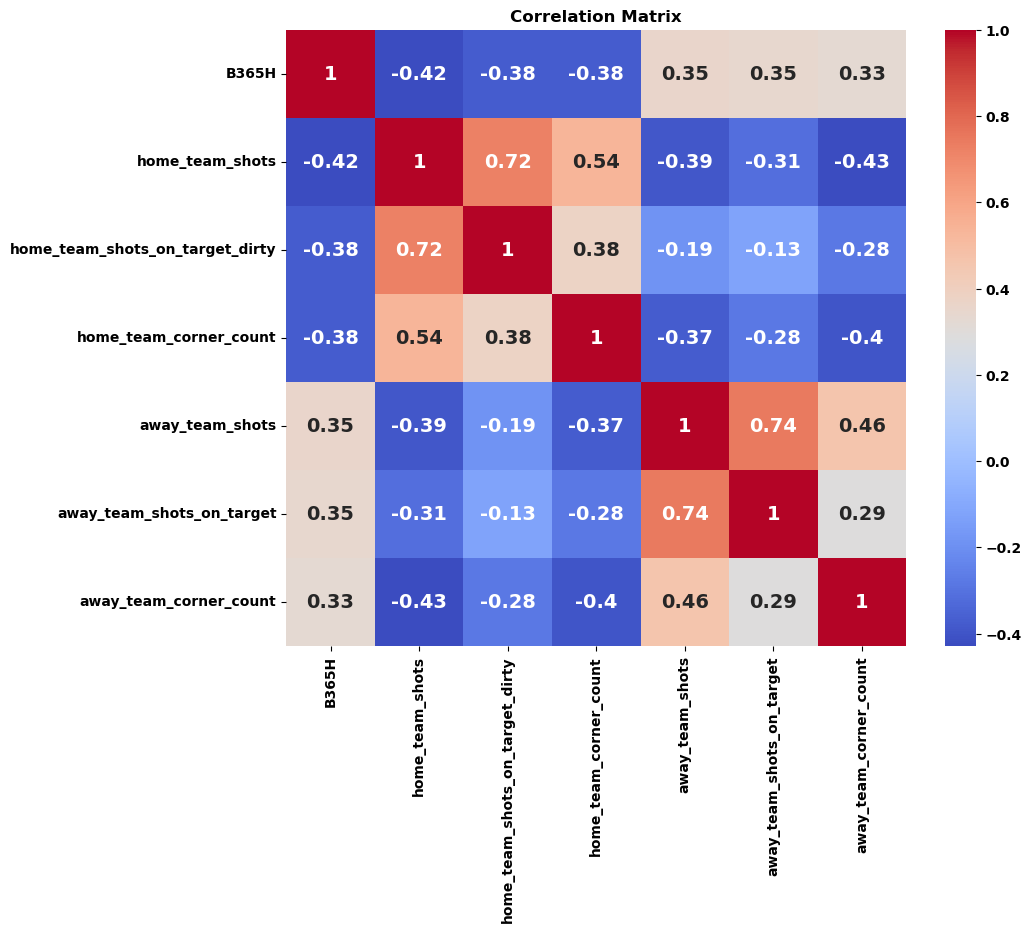

In [64]:
# Select only the numeric columns
numeric_columns = matches_info_df.select_dtypes(include=['float64', 'int64'])

numeric_columns = numeric_columns[['B365H', 'home_team_shots', 'home_team_shots_on_target_dirty',
                                   'home_team_corner_count', 'away_team_shots',
                                   'away_team_shots_on_target', 'away_team_corner_count']]

# Calculate the covariance matrix
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()


A matriz de correlação é importante para nossa análise porque nos permite entender as relações entre diferentes variáveis no conjunto de dados. Isso pode nos ajudar a identificar padrões, entender como as variáveis estão relacionadas entre si e selecionar as variáveis mais relevantes para nossas análises subsequentes. O coeficiente de correlação varia de -1 a 1 e indica a força e a direção da relação linear entre duas variáveis. Um valor próximo de 1 indica uma correlação positiva forte, enquanto um valor próximo de -1 indica uma correlação negativa forte. Um valor próximo de 0 indica pouca ou nenhuma correlação.

como podemos ver, realmente as colunas de chutes e chutes na barra estao fortemente correlacionadas, ja os chutes e escanteios estao moderadamente correlacionadas

### Correlation matrix

In [65]:
corr_matrix

,B365H,home_team_shots,home_team_shots_on_target_dirty,home_team_corner_count,away_team_shots,away_team_shots_on_target,away_team_corner_count
B365H,1.000000,-0.423790,-0.376683,-0.375919,0.354509,0.345701,0.327991
home_team_shots,-0.423790,1.000000,0.723676,0.535195,-0.392182,-0.312608,-0.428405
home_team_shots_on_target_dirty,-0.376683,0.723676,1.000000,0.379600,-0.188191,-0.126901,-0.281062
home_team_corner_count,-0.375919,0.535195,0.379600,1.000000,-0.373042,-0.279580,-0.395238
away_team_shots,0.354509,-0.392182,-0.188191,-0.373042,1.000000,0.744171,0.459662
away_team_shots_on_target,0.345701,-0.312608,-0.126901,-0.279580,0.744171,1.000000,0.290645
away_team_corner_count,0.327991,-0.428405,-0.281062,-0.395238,0.459662,0.290645,1.000000


##### Filters the DataFrame to include only the rows where the home team is Manchester City. Then, it selects only the numeric columns of interest related to betting odds (B365H) and various statistics of shots and shots on target for both home and away teams. After selecting these columns, it calculates the correlation matrix to analyze the relationships between these variables.

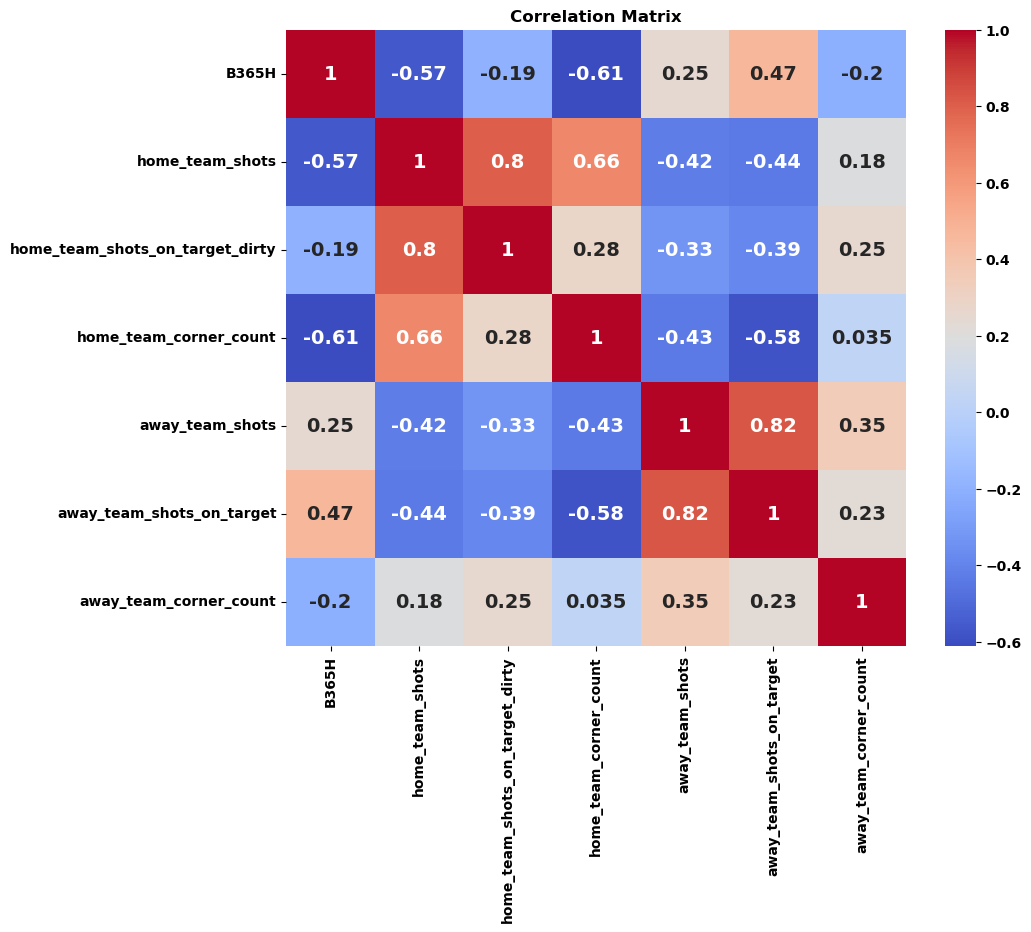

In [66]:
# Filter the DataFrame to include only the rows where the home team is Manchester City
city_data = matches_info_df[matches_info_df['home_team_name'] == 'Manchester City']

# Select only the numeric columns
numeric_columns = city_data[['B365H', 'home_team_shots', 'home_team_shots_on_target_dirty',
                                   'home_team_corner_count', 'away_team_shots',
                                   'away_team_shots_on_target', 'away_team_corner_count']]

# Calculate the covariance matrix for Manchester City's data
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()

Nas duas matrizes, uma delas exibe as correlações gerais, enquanto a outra focaliza a correlação de um time específico, o "Manchester City". É notável identificar algumas correlações distintas, como, por exemplo, entre os chutes do time da casa e o número de escanteios, onde ambas as colunas exibem uma correlação próxima de 1 em ambas as matrizes.

Essa observação sugere uma possível relação: times que arriscam mais chutes tendem a conquistar mais chutes na barra e escanteios durante a partida para sua equipe.

Já o Manchester City, possue uma maior correlação que a media, sugerindo que realmente é o melhor time, possuindo uma maior constancia e tendencia a marcar mais gols


## Function to Calculate Pearson Correlation for each team

In [67]:
def calculate_pearson_correlations(group):
    corr_shots_on_target = group['home_team_shots'].corr(group['home_team_shots_on_target_dirty'])
    corr_shots_corners = group['home_team_shots'].corr(group['home_team_corner_count'])
    return pd.Series({
        'corr_shots_on_target': corr_shots_on_target,
        'corr_shots_corners': corr_shots_corners
    })

# Calculate Pearson correlations for each team
correlations = matches_info_df.groupby('home_team_name').apply(calculate_pearson_correlations)

# Sort the correlations from lowest to highest by shots and shots on target correlation
sorted_correlations = correlations.sort_values(by='corr_shots_on_target', ascending=False)

# Print the sorted correlations
print(sorted_correlations)
# imprimir do lado a porcentagem de acertos ao lado de chutes e acertos na barra

                         corr_shots_on_target  corr_shots_corners
home_team_name                                                   
Newcastle United                     0.943658            0.447758
AFC Bournemouth                      0.905479            0.346680
Tottenham Hotspur                    0.860770            0.296738
Manchester City                      0.803501            0.660763
Crystal Palace                       0.798974            0.607759
West Ham United                      0.787481            0.571673
Leicester City                       0.771297            0.587877
Cardiff City                         0.751890            0.498537
Fulham                               0.748653            0.537689
Huddersfield Town                    0.718404            0.265869
Liverpool                            0.718265            0.424743
Wolverhampton Wanderers              0.670436            0.717588
Watford                              0.640399            0.059426
Burnley   

podemos observar aqui que o Newcastle é o time que possui a maior correlação sugerindo uma boa constancia de crescimento entre chutes e chutes na barra

### Calculates the covariance matrix to analyze the relationships between these variables

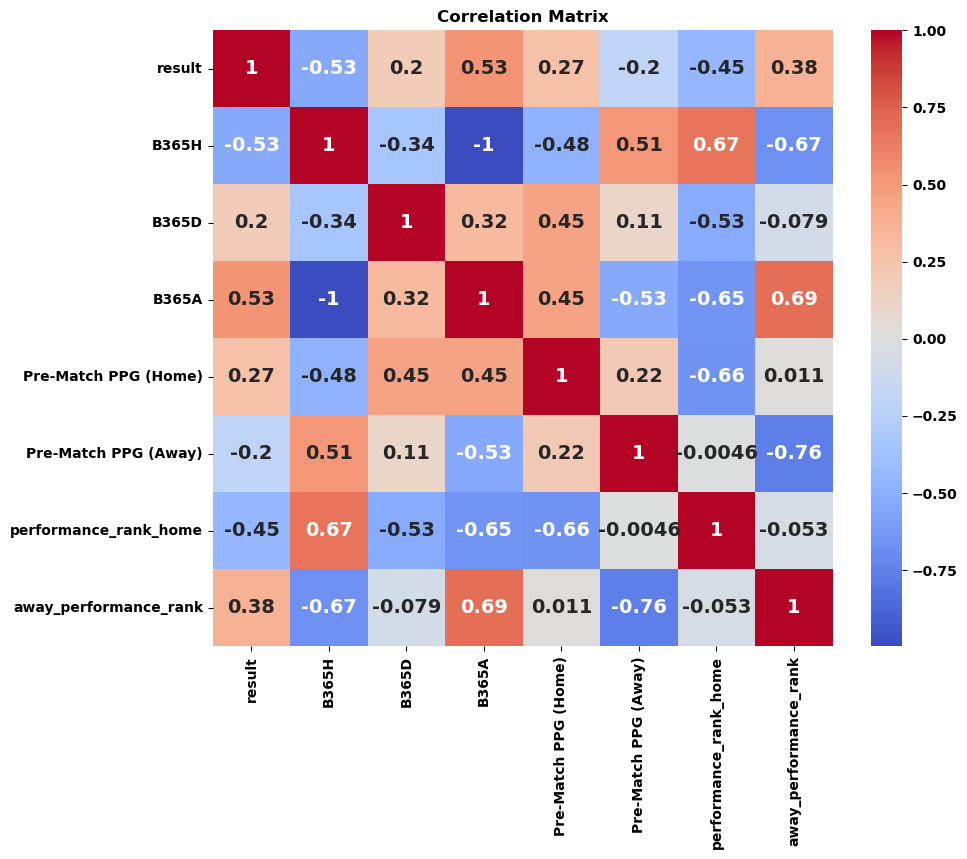

In [68]:
# Select only the numeric columns
numeric_columns = matches_info_df.select_dtypes(include=['float64', 'int64'])

# Further filter numeric columns to include specific columns of interest
numeric_columns = numeric_columns[['result', 'B365H', 'B365D','B365A','Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'performance_rank_home','away_performance_rank']]

# Calculate the covariance matrix for the selected numeric columns
corr_matrix = numeric_columns.corr('spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()


From this correlation matrix, it's also possible to observe the correlation between the bets and the team's performance in the championship. Columns such as "B35H" and "home performance rank" or "B365A" and "away performance rank" clarify that the bets have a certain level of correlation in the analysis of teams and can become reliable to some extent, but they're not perfect either.

"Não existe bala de prata :)"

saving changes to CSV

In [69]:
matches_info_df.to_csv('discretized_matches_info_df.csv')
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_team_fouls,away_team_fouls,dirty,B365H_log,B365D_log,B365A_log,B365H_classification,B365D_classification,B365A_classification,home_shots_2_score
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,11,8,0,0.451076,1.360977,2.014903,0,0,2,4.0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,11,12,0,1.360977,1.252763,0.712950,2,0,0,11.0
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,11,9,0,0.641854,1.280934,1.504077,0,0,1,5.5
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,9,11,1,0.916291,1.223775,1.098612,1,0,1,inf
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,9,8,0,1.871802,1.386294,0.476234,2,0,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,3,11,0,0.262364,1.791759,2.397895,0,1,3,5.5
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,9,6,0,0.246860,1.871802,2.397895,0,2,3,inf
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,8,6,0,0.364643,1.558145,2.140066,0,1,2,7.0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,10,13,0,0.788457,1.252763,1.252763,1,0,1,4.5
